In [1]:
sys.path.append('/Users/akuan/repos/ppc_project_analysis/tracing_analysis')
import navis
import pymaid
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import importlib
import pandas as pd
import pickle
from scipy import stats as stats

import analysis_dataframes as myDF
import ppc_analysis_functions.catmaid_API as cAPI
import ppc_analysis_functions.figure_plotting as figs
importlib.reload(figs)
# connect to pymaid instance

#rm = pymaid.CatmaidInstance('http://catmaid3.hms.harvard.edu/catmaidppc',
#      api_token='9afd2769efa5374b8d48cb5c52af75218784e1ff', project_id=1)
#labels = pymaid.get_label_list()

figsDir = '/Users/akuan/Dropbox (HMS)/htem_team/projects/PPC_project/final_fig_panels/ED_Fig2/'
workingDir = '/Users/akuan/Dropbox (HMS)/htem_team/projects/PPC_project/analysis_dataframes/'

# Define LR colormap and make colorbar
#pal = {'anti':'#C79BCF', 'co':'#5CB8A4'} # lighter
pal = {'anti':'#ba48cf', 'co':'#2CB899'} # darker
order = ['anti','co']

dataset='PPC'

In [2]:
# # Supp. Table 1: Export table of E-to-I connections
with open(workingDir+'dir_cn_DF_PPC.pkl', 'rb') as f:  
    dir_cn_DF= pickle.load(f)

E2I_cn_DF = dir_cn_DF[dir_cn_DF.cn_type == 'E-I']
E2I_cn_DF['pair_select_sign'] = np.sign(E2I_cn_DF.pair_select_idx)
pd.options.display.float_format = '{:.3f}'.format
E2I_cn_DF[['source','source_select_idx_new','target','target_select_idx_new','pair_select_idx_new','pair_select_idx_tmax_new','syn_count','cable_overlap','syn_den','avg_psd_area']].sort_values(by = ['pair_select_idx_new']).to_csv(figsDir+'E2I_table.csv',float_format='%.3g')

In [2]:
# # Supp. Table 1: Export table of E-to-I connections
with open(workingDir+'MN_DF_PPC.pkl', 'rb') as f:  
    MN_DF= pickle.load(f)
typed_DF = MN_DF[MN_DF.type.isin(['pyramidal','non pyramidal'])]
typed_DF[~np.isnan(typed_DF.select_idx_MI)]

,Ca_trial_mean_bR,Ca_trial_mean_wL,MI_trial_avg,axon_len,axon_len_collats,axon_len_trunk,choiceMI_max_idx,choiceMI_max_idx_epoch,collat_angles,collat_density,...,selectivity_MI,sessions_ROI,sessions_select_idx_MI,sessions_select_idx_MI_t,skeleton_id,soma_loc,syn_density_collat,syn_density_trunk,synapse_ids,type
22901,"[0.028419429490740944, 0.05431497056374889, 0....","[0.23801644299372074, 0.08435332295092278, 0.0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1626.911875,934.627125,685.592000,27.333333,cueLate,0 67.025312 1 63.197869 2 110.43931...,0.014586,...,Non,"[0, 154, -1, 428]","[0.15036267935284447, 0.1600536307818385, nan,...","[[-0.013761478443519794, -1.7702592663729373e-...",22901.0,"[1242630.0, 308105.0, 29120.0]",0.043868,0.011669,"0 [17169797, 17169796, 2152866, 2152862, 21...",pyramidal
142354,"[0.004654576414638962, 0.0, 0.0257187617123055...","[0.021664209500059383, 0.007080773297328238, 0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1871.811250,1307.050000,554.495063,52.333333,turn,0 117.553976 1 60.117354 2 164.27...,0.021641,...,Non,"[-1, 16, 47, 5]","[nan, -0.1191533255327245, 0.03311559329976312...","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...",142354.0,"[1333980.0, 303674.0, 10360.0]",0.044375,0.027052,"0 [17736163, 17736161, 17734760, 17734247,...",pyramidal
149789,"[0.019449592538362065, 0.04002680995617701, 0....","[0.06315426928241559, 0.02648286491975228, 0.0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",959.055625,614.807375,340.580188,43.000000,delay,0 93.319905 1 86.508911 2 104.19419...,0.026425,...,Non,"[10, 4, 6, 24]","[-0.1087393313404552, -0.06672647404256828, -0...","[[-0.016275543455311844, -0.0046389111148864, ...",149789.0,"[1378200.0, 300057.0, 41560.0]",0.030904,0.020553,"0 [1341029, 911007, 910992, 910778, 910117,...",pyramidal
144066,"[0.02069186362924769, 0.011790409372028878, 0....","[0.10219614292689978, 0.09503939493511056, 0.0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1296.163750,858.507125,430.989500,58.500000,turn,0 101.209716 1 88.809216 2 87.32...,0.034804,...,Non,"[30, 73, -1, -1]","[0.08051775999590556, 0.15985204569715028, nan...","[[-0.004019747913103729, -0.0046389111148864, ...",144066.0,"[1311450.0, 310540.0, 34240.0]",0.048922,0.020882,"0 [17527391, 17526931, 17526883, 17526851,...",pyramidal
143896,"[0.055770082484615825, 0.010731493462581024, 0...","[0.017258732745642765, 0.0041212307993290015, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",355.651437,191.212375,162.563031,51.750000,delay,0 105.634265 1 147.182600 2 106.53266...,0.024606,...,Non,"[31, 62, 46, 58]","[0.2591420503039352, 0.22801401818692738, 0.26...","[[0.0008005104940764511, -0.004689431055718079...",143896.0,"[1181050.0, 294801.0, 51440.0]",0.041838,0.024606,"0 [17169791, 2153015, 890445, 890221, 83153...",pyramidal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179145,"[0.016307449186072343, 0.10249568728465738, 0....","[0.05541163883461957, 0.04618149225678126, 0.0...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",717.724438,399.694656,314.196188,35.000000,cueLate,0 101.451621 1 78.556027 2 78.22922...,0.019096,...,Non,"[-1, -1, -1, 877]","[nan, nan, nan, 0.06388744796635752]","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...",179145.0,"[1254440.0, 338545.0, 45120.0]",0.067552,0.025462,"0 [18077587, 18076311, 18076155, 18076045, ...",pyramidal
176548,"[0.002944890720090141, 0.009997858007829305, 0...","[0.0, 0.08148437607458815, 0.00716070988114622...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",55.512234,0.592212,54.607641,48.000000,delay,"0 51.627913 Name: collat_angles, dtype: flo...",0.018312,...,Non,"[-1, -1, -1, 1562]","[nan, nan, nan, 0.03771465308615006]","[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...",176548.0,"[1364010.0, 368418.0, 21720.0]",NaN,NaN,"0 [] Name: synapse_ids, dtype: object",pyramidal
196475,"[0.019835197471477675, 0.04999525925236762, 0....","[0.00062

Co: n=106,  20.099 +- 1.684
Anti: n=103, 25.382 +- 2.763
MannwhitneyuResult(statistic=5206.0, pvalue=0.563495021629621)


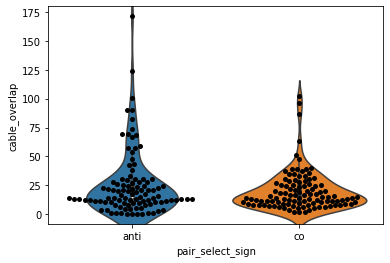

In [3]:
# (Not a fig but used in text)
# Is E2I cable overlap different between co and anti? 
dataset = 'PPC'
with open(workingDir + 'pot_dir_cn_DF_'+dataset+'.pkl' , 'rb') as f:  
    pot_cns = pickle.load(f)

pot_cns = pot_cns[pot_cns.cn_type == 'E-I']
#pot_cns = pot_cns[pot_cns.cn_type == 'I-E']
pot_cns['pair_select_sign'] = ['co' if i>=0 else 'anti' for i in pot_cns.pair_select_idx_new]

sns.violinplot(data=pot_cns, y='cable_overlap', x = 'pair_select_sign')
sns.swarmplot(data=pot_cns, y='cable_overlap', x = 'pair_select_sign', color='k')
same = pot_cns[pot_cns.pair_select_sign == 'co'].cable_overlap.values
opp = pot_cns[pot_cns.pair_select_sign == 'anti'].cable_overlap.values
print('Co: n=%i,  %.03f +- %.03f' % (len(same), np.mean(same), stats.sem(same)))
print('Anti: n=%i, %.03f +- %.03f' % (len(opp), np.mean(opp), stats.sem(opp)))
print(stats.mannwhitneyu(same, opp))

Max syn_count is 4
4
Co: n=1,  95.892 +- nan
Anti: n=0, nan +- nan
Mann Whitney for 4
3
Co: n=0,  nan +- nan
Anti: n=0, nan +- nan
Mann Whitney for 3
2
Co: n=3,  56.499 +- 23.136
Anti: n=2, 120.263 +- 51.166
Mann Whitney for 2
MannwhitneyuResult(statistic=1.0, pvalue=0.4)
1
Co: n=11,  28.396 +- 6.216
Anti: n=4, 62.574 +- 16.407
Mann Whitney for 1
MannwhitneyuResult(statistic=8.0, pvalue=0.07765567765567766)
0
Co: n=91,  17.063 +- 1.249
Anti: n=97, 21.892 +- 2.247
Mann Whitney for 0
MannwhitneyuResult(statistic=4078.0, pvalue=0.3689412234228401)
0.046690272443500984 0.02227363752387566


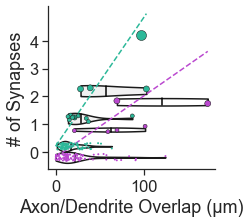

In [4]:
# ED Fig. 5a: Plot all E2I connections and cable overlaps
dataset = 'PPC'
with open(workingDir + 'pot_dir_cn_DF_'+dataset+'.pkl' , 'rb') as f:  
    pot_cns = pickle.load(f)
def classify_syn_count(n):
    return(str(int(n)))
E2I_pot_cns = pot_cns[pot_cns.cn_type == 'E-I']
E2I_pot_cns['pair_select_sign'] = ['co' if i>=0 else 'anti' for i in E2I_pot_cns.pair_select_idx_new]
E2I_pot_cns['pair_cn_count'] = [classify_syn_count(i) for i in E2I_pot_cns.syn_count]
order = ['>=1', '0']
print('Max syn_count is %i' % np.max(E2I_pot_cns.syn_count.values))
order = ['4','3','2','1','0']

sns.set(rc={'figure.figsize':(3,3)}, font_scale=1.5, style='ticks')

g=figs.my_violinplot(data = E2I_pot_cns[E2I_pot_cns.syn_count < 3], y='pair_cn_count', x='cable_overlap', hue='pair_select_sign', scale='count', order=order, hue_order = ['co', 'anti'],  color='w')

#  Plot each pair with markers and size based on # of synapses
syn_counts = np.arange(int(np.max(E2I_pot_cns.syn_count.values)+1))
markers = ['.','.','.','.','.','.']
w = [0,.5, .5, .5, .5]
sizes = [4,8,12,16,20]
for c in syn_counts:
    my_data = E2I_pot_cns[E2I_pot_cns.syn_count == c]
    if len(my_data) > 0:
        sns.stripplot(data=my_data, y='pair_cn_count', x='cable_overlap', hue='pair_select_sign', edgecolor='k',jitter=.25,linewidth=w[c],s=sizes[c], marker=markers[c], dodge=True,order=order, hue_order = ['co', 'anti'], palette = pal, ax=g)

plt.ylabel('# of Synapses')
plt.xlabel('Axon/Dendrite Overlap (µm)')
g.get_legend().remove()
sns.despine()

for cat in order:
    print(cat)
    cat_df = E2I_pot_cns[E2I_pot_cns.pair_cn_count == cat]
    same = cat_df[cat_df.pair_select_sign == 'co'].cable_overlap.values
    opp = cat_df[cat_df.pair_select_sign == 'anti'].cable_overlap.values

    print('Co: n=%i,  %.03f +- %.03f' % (len(same), np.mean(same), stats.sem(same)))
    print('Anti: n=%i, %.03f +- %.03f' % (len(opp), np.mean(opp), stats.sem(opp)))
    print('Mann Whitney for %s' % cat)
    if len(same) > 0 and len(opp) > 0:
        print(stats.mannwhitneyu(same, opp))

with open(workingDir+'dir_cn_DF_PPC.pkl', 'rb') as f:  
    dir_cn_DF= pickle.load(f)
E2I_cn_DF = dir_cn_DF[dir_cn_DF.cn_type == 'E-I']
same_slp = np.mean(E2I_cn_DF[E2I_cn_DF.pair_select_idx>0].syn_den.values)
opp_slp = np.mean(E2I_cn_DF[E2I_cn_DF.pair_select_idx<0].syn_den.values)
print(same_slp, opp_slp)

same_max = np.max(E2I_pot_cns[E2I_pot_cns.pair_select_idx>0].cable_overlap.values)
opp_max = np.max(E2I_pot_cns[E2I_pot_cns.pair_select_idx<0].cable_overlap.values)
plt.plot([0,same_max],4-np.array([0, same_max*same_slp])-.2,'--', color = pal['co']) # y axis is inverted, correct for hue shift
plt.plot([0,opp_max],4-np.array([0, opp_max*opp_slp])+.2,'--', color = pal['anti']) # y axis is inverted, correct for hue shift

# plt.savefig(figsDir+'E2I_cable_overlaps_'+dataset+'.pdf',bbox_inches='tight')

Overlap Threshold: 36.847
0.0 0.0 0.0
p_value for permutation test: 0.000
co: n = 21, c = 0.0315 +- 0.001
anti: n = 21, c = 0.0157 +- 0.001


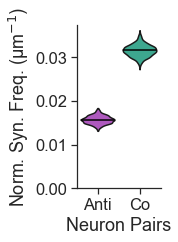

In [5]:
# ED Fig. 5b: Plot co/anti select freq including non-connects
# Edit to bootstrap only non-connects and include only non-connects with 
# overlap greater than avg overlap for 1 synapse
# estimate upper bound of syn freq for non-connects

with open(workingDir + 'pot_dir_cn_DF_PPC.pkl' , 'rb') as f:  
    pot_cns = pickle.load(f)
E2I_pot_cns = pot_cns[pot_cns.cn_type == 'E-I']

E2I_pot_cns.dropna(subset = ['pair_select_idx'])
E2I_pot_cns['pair_select_sign'] = ['co' if i>=0 else 'anti' for i in E2I_pot_cns.pair_select_idx]

E2I_cns = E2I_pot_cns[E2I_pot_cns.syn_count > 0] # E2I_cns is connected pairs
cn_syn_freq_df = myDF.calc_syn_freq_totals(E2I_cns)

overlap_thresh = 1/cn_syn_freq_df.freq_all.values[0] # average path length needed for 1 synapse
print('Overlap Threshold: %0.3f' % overlap_thresh)
E2I_non = E2I_pot_cns[E2I_pot_cns.syn_count == 0] # I2E_non is non-connected pairs
E2I_non = E2I_non[E2I_non.cable_overlap >= overlap_thresh] # only include non-connects with overlap beyond thresh
E2I_non['syn_count'] = 1 # calculate upper bound of syn freq by counting 1 syn per pair
non_syn_freq_df = myDF.calc_syn_freq_totals(E2I_non, shuf=False)

all_pot_cns = pd.concat([E2I_cns, E2I_non]) # Pool connected and upper bound syn freq estimate from non-connected
syn_freq_df_all = myDF.calc_syn_freq_totals(all_pot_cns)

n_shuf = 1000
syn_freq_df_boot = pd.DataFrame()
for n_shuf in range(n_shuf):
    E2I_non_boot = E2I_non.sample(frac=1, replace=True)
    all_pot_cns_boot = pd.concat([E2I_cns, E2I_non_boot]) # bootstrap over non-connected pairs only
    df_boot = myDF.calc_syn_freq_totals(all_pot_cns_boot)
    syn_freq_df_boot = pd.concat([syn_freq_df_boot, df_boot])

boot_plt_df = pd.DataFrame()
for i in ['co', 'anti']:
    df = pd.DataFrame()
    df['freq'] = syn_freq_df_boot['freq_'+i]
    df['pair_select'] = i
    boot_plt_df = pd.concat([boot_plt_df, df])
boot_plt_df

sns.set(rc={'figure.figsize':(1.5,3)}, font_scale=1.5, style='ticks')
order = ['anti', 'co']
g=figs.my_violinplot(data = boot_plt_df, x = 'pair_select', y='freq', palette = pal, order = order, scale='width')
g.set_ylim([0,g.get_ylim()[1]])
g.set_ylabel('Norm. Syn. Freq. (µm$^{-1}$)')
g.set_xlabel('Neuron Pairs')
g.set_xticklabels(['Anti', 'Co'])
sns.despine()

# Calculate p-value of difference between co and anti being different from 0, 
# bootstrapping over non-connected neurons.
p1 = stats.percentileofscore(syn_freq_df_all.freq_diff[0]-syn_freq_df_boot.freq_diff, syn_freq_df_all.freq_diff[0])
p2 = stats.percentileofscore(syn_freq_df_all.freq_diff[0]-syn_freq_df_boot.freq_diff, -syn_freq_df_all.freq_diff[0])

p_score1 = np.minimum(p1, 100-p1)/100
p_score2 = np.minimum(p2, 100-p2)/100
p_value = p_score1 + p_score2
print(p_score1, p_score2, p_value)

print('p_value for permutation test: %0.3f' % p_value)
print('co: n = %i, c = %0.4f +- %0.3f' % (sum(all_pot_cns.pair_select_sign == 'co'), syn_freq_df_all['freq_co'].values[0], np.std(syn_freq_df_boot.freq_co)))
print('anti: n = %i, c = %0.4f +- %0.3f' % (sum(all_pot_cns.pair_select_sign == 'anti'), syn_freq_df_all['freq_anti'].values[0], np.std(syn_freq_df_boot.freq_anti)))

# plt.savefig(figsDir+'I2E_co-anti_freq_with_nonconnects.pdf',bbox_inches='tight')

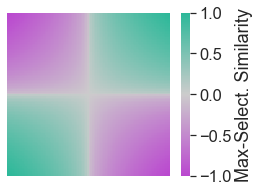

In [6]:
# ED Fig. 5c: Heatmap of choice similarity values
n = 100
max = 1
xvals,yvals = np.linspace(max,-max,n), np.linspace(-max,max,n)
csim = np.zeros((n,n))
csim_df = pd.DataFrame([])
for ix,x in enumerate(xvals):
    for iy, y in enumerate(yvals):
        csim[ix, iy] = myDF.add_pair_select_idx(x, y)
        csim_s = pd.Series({'x':xvals, 'y':yvals, 'csim':csim[ix,iy]})
        csim_df = csim_df.append(csim_s, ignore_index=True)
sns.set(rc={'figure.figsize':(4,3)}, font_scale=1.5)
from matplotlib.colors import LinearSegmentedColormap
my_cmap = LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#BA48CF-CCCCCC-2CB899
    (0.000, (0.729, 0.282, 0.812)),
    (0.500, (0.800, 0.800, 0.800)),
    (1.000, (0.173, 0.722, 0.600))))
ax = sns.heatmap(csim, cmap=my_cmap, xticklabels=False, yticklabels=False,
    square=True, cbar_kws={'label': 'Max-Select. Similarity'})
# plt.savefig(figsDir+'Choice_Sim_Ex.pdf',bbox_inches='tight')

[ 2.61015722  3.16227766  3.83118685  4.64158883  5.62341325  6.81292069
  8.25404185 10.         12.11527659 14.67799268 17.7827941  56.23413252
 82.54041853]
[]


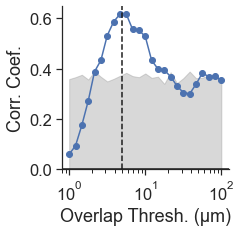

In [7]:
# Ext. Data Fig. 5d 
# Sweep overlap distance to see how it affects structure-function corr
sns.set(rc={'figure.figsize':(3,3)}, font_scale=1.5, style='ticks')
cn_type = 'E-I'
#cn_type = 'I-E'
#max_dists = np.logspace(0.7,4,num=3)
with open(workingDir+'sweepD_pearson_'+cn_type+'_dir_cn_DF_PPC.pkl', 'rb') as f:  
    sweep_d = pickle.load(f)
max_dists = sweep_d['max_dists']
plt.plot(max_dists,sweep_d['corrs'],'-o')
#plt.plot(max_dists,sweep_d['shuf_low'],'--')
#plt.plot(max_dists,sweep_d['shuf_high'],'--')
if cn_type == 'E-I':
    plt.fill_between(max_dists, 0,sweep_d['shuf_high'], alpha=0.3, color='gray')
elif cn_type == 'I-E':
    plt.fill_between(max_dists, sweep_d['shuf_low'],0, alpha=0.3, color='gray')
plt.xscale('log')
plt.axhline(y=0, color='k')
plt.axvline(x=5, color='k', linestyle='--')
#plt.ylim([-1,1])
plt.xlabel('Overlap Thresh. (µm)')
plt.ylabel('Corr. Coef.')
#plt.title(cn_type)
sns.despine()

xmin, xmax, ymin, ymax = plt.axis()
#plt.ylim(ymin,0.01)
plt.ylim(0,ymax)
print(max_dists[sweep_d['corrs']>sweep_d['shuf_high']])
print(max_dists[sweep_d['corrs']<sweep_d['shuf_low']])

#plt.savefig(figsDir+cn_type+'_d_sweep.pdf',bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

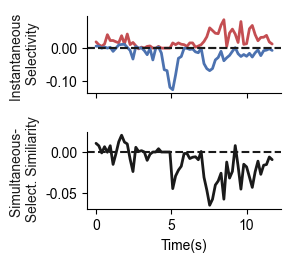

In [8]:
# ED Fig. 5e: Plot example neuron activity and new pair MI

def avg_lr(row):
    try:
        return (row['Ca_trial_mean_bR']+row['Ca_trial_mean_wL'])/2
    except:
        return np.nan

def find_max_idx(Ca):
    if np.isnan(Ca).any():
        return np.nan
    else:
        return np.nanargmax(Ca)

def color_epochs(ax3):
    ylim = ax3.get_ylim()
    ax3.fill_between(t_cueEarly,0,ylim[1], facecolor=colors['cueEarly'], alpha=0.2)
    ax3.fill_between(t_cueLate,0,ylim[1], facecolor=colors['cueLate'], alpha=0.2)
    ax3.fill_between(t_delay,0,ylim[1], facecolor=colors['delay'], alpha=0.2)
    ax3.fill_between(t_turn,0,ylim[1], facecolor=colors['turn'], alpha=0.2)
    ax3.fill_between(t_ITI,0,ylim[1], facecolor=colors['ITI'], alpha=0.2)

with open(workingDir+'MN_DF_PPC.pkl' , 'rb') as f:  
    my_DF = pickle.load(f)

# asynchronous:
a1 = my_DF[my_DF.skeleton_id == 140120] #22901 #140120
a2 = my_DF[my_DF.skeleton_id == 177789] #140120 #177789
							
plt.style.use('default')
plt.rcParams['font.size'] = '10'
fig=plt.figure()

fig, (ax1,ax2) = plt.subplots(figsize=(2.5, 2.5),ncols=1, nrows=2, sharey=False, sharex=True)
sns.set(rc={'figure.figsize':(2.5,2.5)}, font_scale=1, style='ticks')
plt.subplots_adjust(wspace=0.2, hspace = 0.5)

t = np.linspace(0,62,num=63)/5.3
t_cueEarly = t[0:13+1]
t_cueLate = t[14:26+1]
t_delay = t[26:38+1]
t_turn = t[39:51+1]
t_ITI = t[51:62+1]
colors = {'cueEarly':'#019966', 'cueLate':'#006838', 'delay':'#f7941d',
    'turn':'#00aeef','ITI':'#662d91'}

#ax1.set_title('Instananeous Select. Idx.')
ax1.plot(t,a1['select_idx_MI_t'].values[0],'r-', linewidth=2, alpha=1)
ax1.axhline(y=0, linestyle='--', color='k')
ax1.set_ylabel('Instantaneous \n Selectivity', color='k')


ax1.plot(t,a2['select_idx_MI_t'].values[0],'b-', linewidth=2, alpha=1)
ax1.axhline(y=0, linestyle='--', color='k')

#ax2.set_title('Instantaneous Selectivity')
pair_select_idx_t = myDF.add_pair_select_idx_t(a1['select_idx_MI_t'].values[0],a2['select_idx_MI_t'].values[0])
ax2.plot(t,pair_select_idx_t,'k-', linewidth=2, alpha=1)
ax2.set_ylabel('Simultaneous- \n Select. Similiarity', color='k')
ax2.axhline(y=0, linestyle='--', color='k')

ax2.set_xlabel('Time(s)')
from matplotlib.ticker import FormatStrFormatter
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
sns.despine()
plt.savefig(figsDir+'ex_inst_pair_select.pdf',bbox_inches='tight')

n = 21 pairs
Data corr = 0.579
t-test p = 0.006


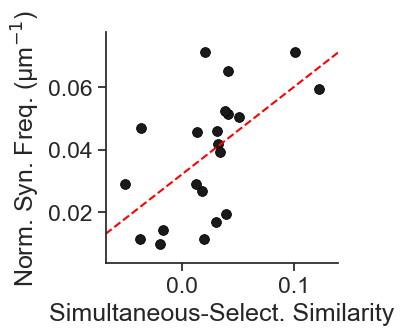

In [9]:
# Ext. Data Fig. 5f
# Syn Freq vs Simul-Select Sim

sns.set(rc={'figure.figsize':(3,3)}, font_scale=1.5, style='ticks')
f,ax0 = plt.subplots(1, 1)

cn_type ='E-I' 
x = 'pair_select_idx_tmax_new'
y='syn_den'
with open(workingDir+'dir_cn_DF_PPC.pkl', 'rb') as f:  
            dir_cn_DF= pickle.load(f)

dir_cn_DF = dir_cn_DF[dir_cn_DF.cn_type==cn_type]
dir_cn_DF.dropna(subset=[x,y], inplace=True)

(c,p) = figs.scatter(dir_cn_DF, x=x, y=y, color='k',sig_test='pearson',s=50, ax=ax0)
print('n = %i pairs' % len(dir_cn_DF))
print('Data corr = %.3f' % c)
print('t-test p = %.3f' % p)

ax0.set_xlabel('Simultaneous-Select. Similarity')  
ax0.set_ylabel('Norm. Syn. Freq. (µm$^{-1}$)')

sns.despine()
# plt.savefig(figsDir+cn_type+'_'+x+'_vs_'+y+'.pdf',bbox_inches='tight')

Data corr = 0.495
t-test p = 0.006


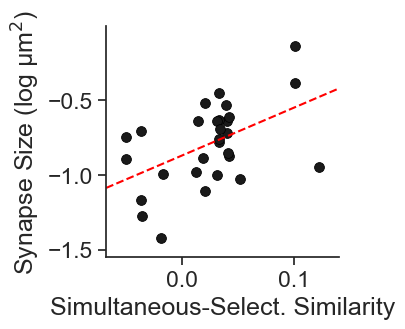

In [10]:
# Ext. Data Fig. 5g
# E2I psd area vs pair_select_idx_tmax
with open(workingDir+'dir_syn_DF_PPC.pkl', 'rb') as f:  
    dir_syn_DF= pickle.load(f)
E2I_syn_DF = dir_syn_DF[dir_syn_DF.cn_type == 'E-I']

sns.set(rc={'figure.figsize':(3,3)}, font_scale=1.5, style='ticks')
f, ax0 = plt.subplots(1, 1)

metric = 'pair_select_idx_tmax_new'
(c,p)=figs.scatter(E2I_syn_DF, x=metric, y='log_psd_area',sig_test='pearson',color= 'k',s=50, ax=ax0)
print('Data corr = %.3f' % c)
print('t-test p = %.3f' % p)
ax0.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax0.set_xlabel('Simultaneous-Select. Similarity')  
ax0.set_ylabel('Synapse Size (log µm$^2$)')
ax0.get_legend().remove()

sns.despine()
#plt.savefig(figsDir+'E2I_psd_area_vs_simul-sel-sim_'+dataset+'.pdf',bbox_inches='tight')

107 neurons
Percent Same: 0.67


BinomTestResult(k=72, n=107, alternative='two-sided', proportion_estimate=0.6728971962616822, pvalue=0.0004453024480626555)

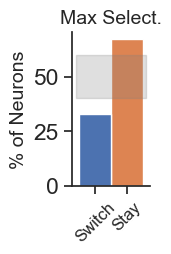

In [12]:
# Ext. Data Fig. 5h
# Does selectivity neurons stay the same or switch?
def source_target(row):
    return(str(int(row['source'])) + '_' + str(int(row['target'])))
sessions = ['early','middle','late']
plot_dict = {}
for sess in sessions:
    with open(workingDir+'MN_DF_'+sess+'_new_PPC.pkl', 'rb') as f:  
        MN_DF= pickle.load(f)
    MN_DF[sess] = MN_DF['select_idx_MI_new']
    plot_dict[sess] = MN_DF[['skeleton_id',sess]]

# Compare early and late sessions
merged_df = pd.merge(plot_dict['early'], plot_dict['late'], on=['skeleton_id'])
#merged_df = pd.merge(merged_df, plot_dict['middle'], on=['skeleton_id'])

# Pairs switch or keep selectivity
merged_df.dropna(inplace=True)
merged_df['switch'] = np.sign(merged_df['early']) == np.sign(merged_df['late'])
num_neurons = len(merged_df)
print('%i neurons' % num_neurons)

sns.set(rc={'figure.figsize':(1,2)}, font_scale=1.5, style='ticks')
fig, ax = plt.subplots(1, 1)

#sns.countplot(data=merged_df, x='switch')
# Plot percentage of switch vs stay same selectivity
sns.histplot(data=merged_df, x='switch', hue='switch',hue_order = [False, True],bins = [-.5,.5,1.5], stat='percent', alpha = 1)
ax.legend_.remove()
sns.despine()

ax.set_ylabel('% of Neurons',fontsize = 14)
ax.set_yticks([0,25,50])
ax.set_title('Max Select.', fontsize = 14)
ax.set_xlabel('', fontsize = 14)
ax.set_xticks([0,1],labels = ['Switch','Stay'], fontsize=12, rotation = 45)
#ax.set_xticklabels(['Switch','Stay'], fontsize=12)

num_same = np.sum(merged_df['switch'].values)
percent_same = num_same/len(merged_df)
print('Percent Same: %0.2f' % percent_same)

conf_int = stats.binom.interval(0.95, num_neurons, 0.5)
plt.fill_between(x=ax.get_xlim(), y1=conf_int[0]/num_neurons*100, y2=conf_int[1]/num_neurons*100,
 color='gray',  interpolate=True, alpha=.25)

stats.binomtest(num_same, num_neurons, p=0.5, alternative='two-sided')
#plt.savefig(figsDir+'neuron_select_switch.pdf',bbox_inches='tight')

96 pairs
Percent Same: 0.61


BinomTestResult(k=59, n=96, alternative='two-sided', proportion_estimate=0.6145833333333334, pvalue=0.03154812025373351)

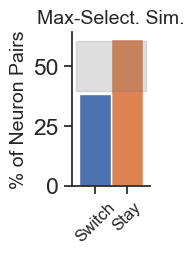

In [13]:
# Ext. Data Fig. 5i
# Does pair selectivity of connected neurons drift together?
def source_target(row):
    return(str(int(row['source'])) + '_' + str(int(row['target'])))
#cn_type = 'I-E'
sessions = ['early','middle','late']
plot_dict = {}
for sess in sessions:
    with open(workingDir+'dir_cn_DF_'+sess+'_PPC.pkl', 'rb') as f:  
        I2E_cn_DF= pickle.load(f)
    I2E_cn_DF = I2E_cn_DF[I2E_cn_DF.cn_type.isin(['I-E', 'E-I'])]
    I2E_cn_DF[sess] = I2E_cn_DF['pair_select_idx_new']
    I2E_cn_DF['source_target'] = I2E_cn_DF.apply (lambda row: source_target(row), axis=1)
    plot_dict[sess] = I2E_cn_DF[['source_target',sess]]

# Compare early and late sessions
merged_df = pd.merge(plot_dict['early'], plot_dict['late'], on=['source_target'])
#merged_df = pd.merge(merged_df, plot_dict['middle'], on=['source_target'])
merged_df.dropna(inplace=True)
num_pairs = len(merged_df)
print('%i pairs' % num_pairs)
# Pairs switch or keep selectivity

merged_df['switch'] =np.sign(merged_df['early'])== np.sign(merged_df['late'])

sns.set(rc={'figure.figsize':(1,2)}, font_scale=1.5, style='ticks')
fig, ax = plt.subplots(1, 1)
#sns.countplot(data=merged_df, x='switch')
sns.histplot(data=merged_df, x='switch', hue='switch',hue_order = [False, True],bins = [-.5,.5,1.5], stat='percent', alpha = 1)

ax.legend_.remove()
sns.despine()
ax.set_ylabel('% of Neuron Pairs',fontsize = 14)
ax.set_yticks([0,25,50])
ax.set_title('Max-Select. Sim.', fontsize = 14)
ax.set_xlabel('', fontsize = 14)
ax.set_xticks([0,1],labels = ['Switch','Stay'], fontsize=12, rotation = 45)

num_same = np.sum(merged_df['switch'].values)
percent_same = num_same/len(merged_df)
print('Percent Same: %0.2f' % percent_same)

conf_int = stats.binom.interval(0.95, num_pairs, 0.5)
plt.fill_between(x=ax.get_xlim(), y1=conf_int[0]/num_pairs*100, y2=conf_int[1]/num_pairs*100,
 color='gray',  interpolate=True, alpha=.25)

stats.binomtest(num_same, num_pairs, p=0.5, alternative='two-sided')
#plt.savefig(figsDir+'neurons_pair_select_switch.pdf',bbox_inches='tight')

early: Data corr = 0.306, t-test p = 0.267
middle: Data corr = 0.531, t-test p = 0.019
late: Data corr = 0.661, t-test p = 0.001


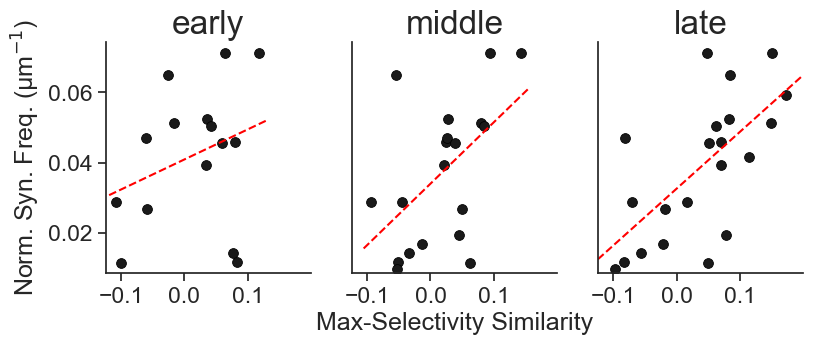

In [14]:
# Ext. Data Fig. 5j
# PPC E2I syn density vs pair_select_idx early/mid/late
sessions = ['early','middle','late']
shuf_df_all = pd.DataFrame()
plot_dict = {}
for sess in sessions:
    with open(workingDir+'dir_cn_DF_'+sess+'_PPC.pkl', 'rb') as f:  
        dir_cn_DF= pickle.load(f)
    E2I_cn_DF = dir_cn_DF[dir_cn_DF.cn_type == 'E-I']
    plot_dict[sess] = E2I_cn_DF

sns.set(rc={'figure.figsize':(9,3)}, font_scale=1.5, style='ticks')
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 1, 1]},
    sharex=False,sharey=True)
plt.subplots_adjust(hspace = .4, wspace=.2)
for idx,ax in enumerate((ax0, ax1, ax2)):
    (c,p) = figs.scatter(plot_dict[sessions[idx]], x='pair_select_idx_new', y='syn_den', s=50, sig_test = 'pearson',ax=ax)
    print(sessions[idx] + ': Data corr = %.3f, t-test p = %.3f' % (c,p))
    ax.set_title(sessions[idx], fontsize=24)
    if idx == 0:
        ax.set_ylabel('Norm. Syn. Freq. (µm$^{-1}$)')
    else:
        ax.get_yaxis().set_visible(False)

    if idx == 1:
        ax.set_xlabel('Max-Selectivity Similarity')
    else:
        ax.set_xlabel(None)
sns.despine()
for idx,ax in enumerate((ax0, ax1, ax2)):
    ax.set_xlim([np.min([ax0.get_xlim()[0],ax1.get_xlim()[0],ax2.get_xlim()[0]]),np.max([ax0.get_xlim()[1],ax1.get_xlim()[1],ax2.get_xlim()[1]])])
sns.despine()
#plt.savefig(figsDir+'E2I_syn_den_vs_choice_sim_Sessions_datapoints.pdf',bbox_inches='tight')

early
middle
late
early: Data corr = 0.197, t-test p = 0.420
middle: Data corr = 0.464, t-test p = 0.023
late: Data corr = 0.562, t-test p = 0.002


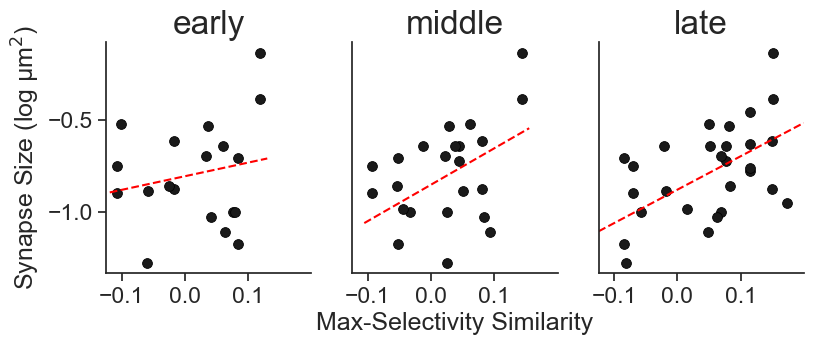

In [15]:
# Ext Data Fig. 5ki
# PPC E2I PSD area vs pair_select_idx early/mid/late
sessions = ['early','middle','late']
shuf_df_all = pd.DataFrame()
plot_dict = {}
for sess in sessions:
    print(sess)
    with open(workingDir+'dir_syn_DF_'+sess+'_PPC.pkl', 'rb') as f:  
        dir_cn_DF= pickle.load(f)

    E2I_cn_DF = dir_cn_DF[dir_cn_DF.cn_type == 'E-I']
    E2I_cn_DF['log_psd_area'] = np.log10(E2I_cn_DF.psd_area.values)
    plot_dict[sess] = E2I_cn_DF

sns.set(rc={'figure.figsize':(9,3)}, font_scale=1.5, style='ticks')
f, (ax0, ax1, ax2) = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 1, 1]}, sharex=False, sharey=True)
plt.subplots_adjust(hspace = .4, wspace=0.2)
for idx,ax in enumerate((ax0, ax1, ax2)):
    (c,p) = figs.scatter(plot_dict[sessions[idx]], x='pair_select_idx_new', y='log_psd_area', s=50, sig_test='pearson',ax=ax)
    print(sessions[idx] + ': Data corr = %.3f, t-test p = %.3f' % (c,p))
    ax.set_title(sessions[idx], fontsize=24)
    if idx == 0:
        ax.set_ylabel('Synapse Size (log µm$^2$)')
    else:
        ax.get_yaxis().set_visible(False)
    if idx == 1:
        ax.set_xlabel('Max-Selectivity Similarity')
    else:
        ax.set_xlabel(None)
    
for idx,ax in enumerate((ax0, ax1, ax2)):
    ax.set_xlim([np.min([ax0.get_xlim()[0],ax1.get_xlim()[0],ax2.get_xlim()[0]]),np.max([ax0.get_xlim()[1],ax1.get_xlim()[1],ax2.get_xlim()[1]])])
sns.despine()
#plt.savefig(figsDir+'E2I_PSD_vs_choice_sim_Sessions_datapoints.pdf',bbox_inches='tight')